In [6]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
train_path = "./house-prices-advanced-regression-techniques/train.csv"
test_path ="./house-prices-advanced-regression-techniques/test.csv"


AttributeError: 'str' object has no attribute 'sample'

In [ ]:
##READDATA!!!!!!

In [12]:

train = pd.read_csv(train_path,index_col='Id')
test = pd.read_csv(test_path,index_col='Id')

# print(type(train))
train.tail(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [23]:
#https://medium.com/@yanweiliu/python-pandas%E4%BD%BF%E7%94%A8%E7%AD%86%E8%A8%98-a4682e254d90
def drop_low_colums(df):
    print(df)
    data_corr = df.corr()
    d_list=data_corr[data_corr.SalePrice<0.5].index.tolist()
    return d_list


In [28]:
# delete 2 column ['YearBuilt','1stFlrSF']
data_train=train.drop(['YearBuilt','1stFlrSF'], axis=1)
data_test=test.drop(['YearBuilt','1stFlrSF'], axis=1)
# delete 4 column ['Alley','PoolQC','Fence','MiscFeature']
data_drop_train=data_train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
data_drop_test=data_train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

#corr 取相關係數?
drop_list=drop_low_colums(data_drop_train)

drop_list

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave    

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [31]:
data_drop_train1=data_drop_train.drop(drop_list, axis=1)
data_drop_test1=data_drop_test.drop(drop_list, axis=1)
data_drop_train1=data_drop_train1.fillna('0')
data_drop_test1=data_drop_test1.fillna('0')


In [32]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = data_drop_train1.select_dtypes(include=object).columns
   
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.fit_transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_drop_train1, data_drop_test1)


In [36]:

data_drop_train2=data_train.corr()
drop_list2=list(data_drop_train2.query('SalePrice<0.5').index)
data_drop_train2=data_train.drop(drop_list2, axis=1)
data_drop_test2=data_test.drop(drop_list2, axis=1)


In [37]:
def change_colums(colums):
    fz=np.ceil(np.log2(colums.max()))
    return fz
 
fz=change_colums(data_drop_train2.GarageArea)
data_drop_train2['GarageArea'] = pd.cut(data_drop_train2.GarageArea, fz)
fz=change_colums(data_drop_train2.GrLivArea)
data_drop_train2['GrLivArea'] = pd.cut(data_drop_train2.GrLivArea, fz)
fz=change_colums(data_drop_train2.TotalBsmtSF)
data_drop_train2['TotalBsmtSF'] = pd.cut(data_drop_train2.TotalBsmtSF, fz)
fz=change_colums(data_drop_train2.YearRemodAdd)
data_drop_train2['YearRemodAdd'] = pd.cut(data_drop_train2.YearRemodAdd, fz)


In [39]:
data_drop_test2["TotalBsmtSF"] = data_drop_test2["TotalBsmtSF"].astype("int64")
data_drop_test2["GarageArea"] = data_drop_test2["GarageArea"].astype("int64")
data_drop_test2["GrLivArea"] = data_drop_test2["GrLivArea"].astype("int64")
data_drop_test2["GarageCars"] = data_drop_test2["GarageCars"].astype("int64")
data_drop_test2.loc[data_drop_test2['YearRemodAdd'] == '0'] = int(data_drop_test2["YearRemodAdd"].mean())


In [40]:
fz=change_colums(data_drop_test2.YearRemodAdd)
data_drop_test2['YearRemodAdd'] = pd.cut(data_drop_test2.YearRemodAdd, fz)
fz=change_colums(data_drop_test2.TotalBsmtSF)
data_drop_test2['TotalBsmtSF'] = pd.cut(data_drop_test2.TotalBsmtSF,fz)
fz=change_colums(data_drop_test2.GarageArea)
data_drop_test2['GarageArea'] = pd.cut(data_drop_test2.GarageArea,fz)
fz=change_colums(data_drop_test2.GrLivArea)
data_drop_test2['GrLivArea'] = pd.cut(data_drop_test2.GrLivArea, fz)


In [41]:
def encode_features1(df_train, df_test):
    features = ['YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
 
data_train1, data_test1 = encode_features1(data_drop_train2, data_drop_test2)


In [42]:
from sklearn.model_selection import train_test_split
X=data_train1[['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y=data_train1['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [43]:
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()


In [44]:
def try_different_method(model, method):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    result = model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, "go-", label="True value")
    plt.plot(np.arange(len(result)), result, "ro-", label="Predict value")
    plt.title(f"method:{method}---score:{score}")
    plt.legend(loc="best")

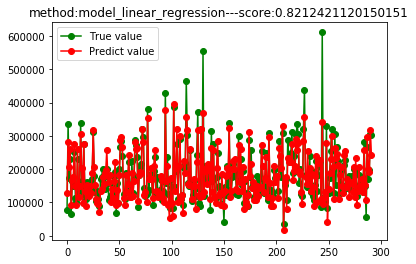

In [45]:
try_different_method(model_linear_regression,"model_linear_regression")